In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("data_cleaned.xlsx")
df = df.drop('Unnamed: 0', axis=1)

In [2]:
X = df.drop("Uspesnost", axis=1)
y = df["Uspesnost"]

from numpy import unique
classes = unique(y)
total = len(y)
for c in classes:
 n_examples = len(y[y==c])
 percent = n_examples / total * 100
 print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

> Class=1 : 6/89 (6.7%)
> Class=2 : 39/89 (43.8%)
> Class=3 : 44/89 (49.4%)


In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
columns_to_one_hot_encode = ['Razred', 'Profesor',"Spol"]

X = pd.get_dummies(X, columns=columns_to_one_hot_encode)

In [5]:
X = X.apply(pd.to_numeric, errors='coerce')

In [6]:
classifiers = [
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianMixture(n_components=2),
    LinearDiscriminantAnalysis(),
    AdaBoostClassifier(n_estimators=1000),
    GradientBoostingClassifier(n_estimators=1000),
    SVC(kernel='rbf'),  # Support Vector Classifier
    RandomForestClassifier(n_estimators=1000)  # Random Forest Classifier
]

classifier_names = [
    "Naive Bayes",
    "K-Nearest Neighbors",
    "Decision Tree",
    "Gaussian Mixture",
    "Linear Discriminant Analysis",
    "AdaBoost",
    "Gradient Boosting",
    "Support Vector Machine",
    "Random Forest"
]

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\U

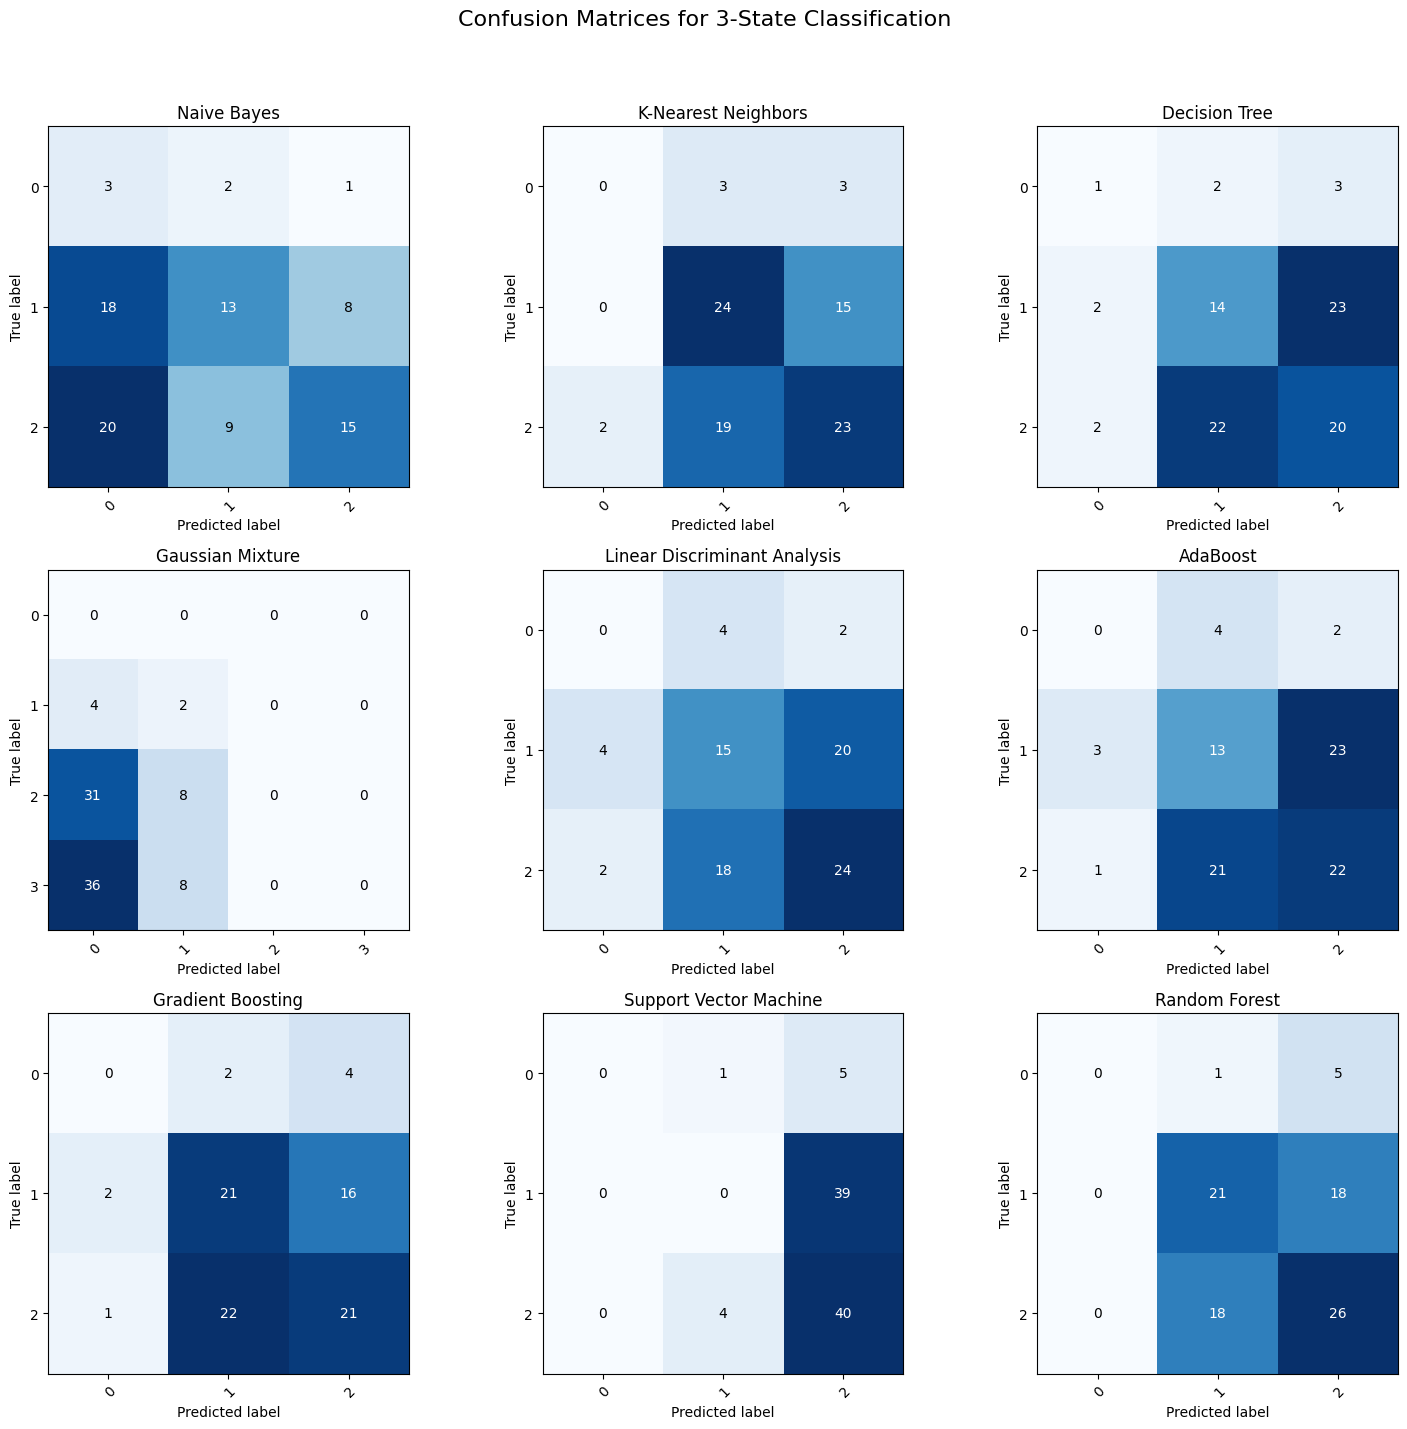

                              accuracy precision_macro recall_macro  f1_macro
Naive Bayes                   0.347059         0.40677     0.388889  0.296329
K-Nearest Neighbors           0.527451        0.361537     0.380688  0.364745
Decision Tree                 0.404575        0.308528     0.290212  0.276188
Gaussian Mixture              0.011111        0.003704     0.066667  0.007018
Linear Discriminant Analysis  0.435294        0.310226     0.309524  0.307328
AdaBoost                      0.392157        0.268395     0.280423  0.266608
Gradient Boosting             0.471242        0.325765     0.339021  0.327834
Support Vector Machine        0.450327        0.158535     0.303704  0.207846
Random Forest                 0.537908          0.3699     0.384127    0.3662


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

# Create a figure with subplots for confusion matrices
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Confusion Matrices for 3-State Classification', fontsize=16)

# Create an empty DataFrame to store results
results_df = pd.DataFrame(index=classifier_names, columns=scoring)

# Perform 5-fold cross-validation for each classifier
for clf, name, ax in zip(classifiers, classifier_names, axs.flatten()):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Cross-validation scores
    scores = cross_validate(clf, X, y, cv=cv, scoring=scoring)
    
    # Update results_df with mean scores
    for metric in scoring:
        results_df.loc[name, metric] = np.mean(scores[f'test_{metric}'])
    
    # Confusion matrix
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    cm = confusion_matrix(y, y_pred)
    
    # Plot confusion matrix
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=name,
           xlabel='Predicted label',
           ylabel='True label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add values in the cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2 else "black")

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display the results table
print(results_df)

results_df = results_df.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

# Save to CSV
results_df.to_csv('classification_3_state.csv', index=False)


In [9]:
from numpy import unique

df = pd.read_excel("data_cleaned.xlsx")
df = df.drop('Unnamed: 0', axis=1)
#Poskusimo narediti le dva classa

df['Uspesnost'].replace({1:0,2: 0, 3: 1}, inplace=True)

X = X
y = df["Uspesnost"]

classes = unique(y)
total = len(y)
for c in classes:
 n_examples = len(y[y==c])
 percent = n_examples / total * 100
 print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

> Class=0 : 45/89 (50.6%)
> Class=1 : 44/89 (49.4%)


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


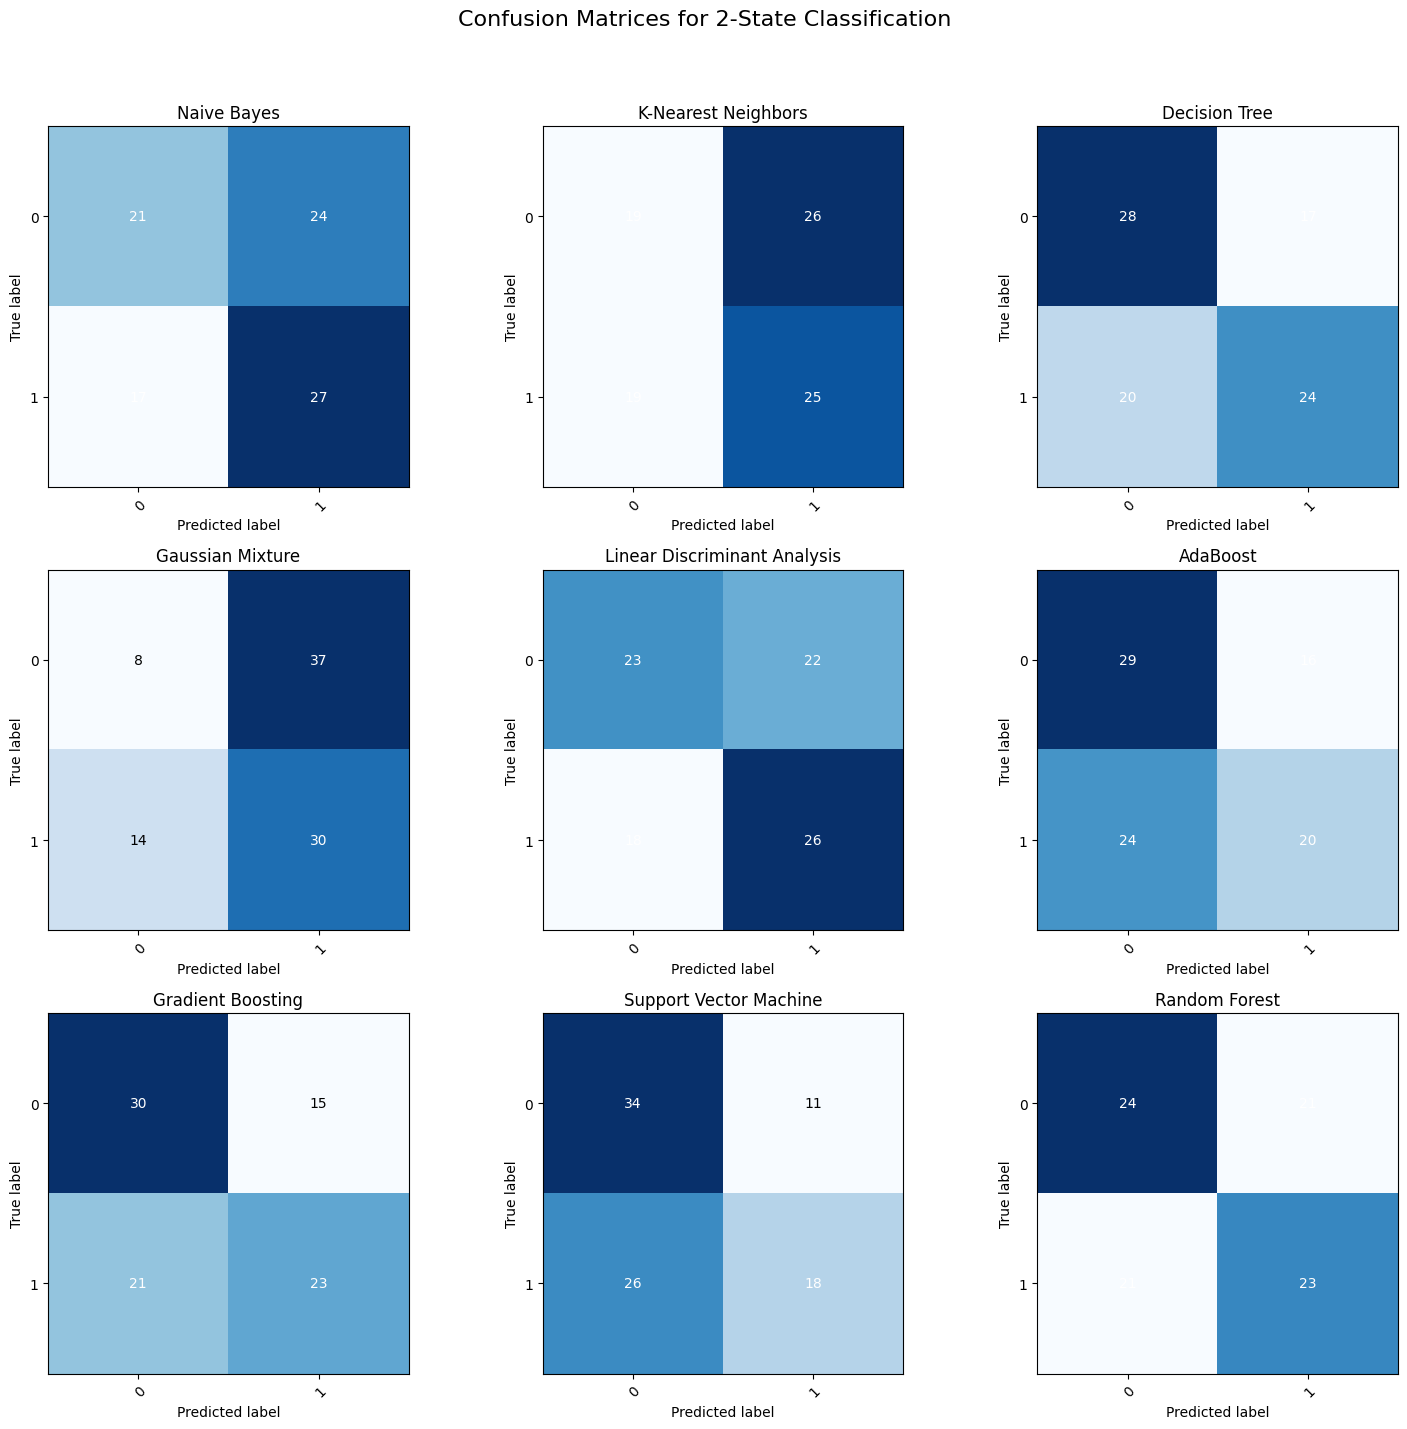

                              accuracy precision_macro recall_macro  f1_macro
Naive Bayes                   0.539216        0.542778     0.538889  0.514231
K-Nearest Neighbors           0.495425        0.494978     0.495833    0.4908
Decision Tree                  0.52549        0.527453     0.523611  0.515754
Gaussian Mixture              0.505882        0.447373     0.502778  0.453019
Linear Discriminant Analysis   0.54902        0.553392         0.55  0.542401
AdaBoost                      0.549673         0.55438         0.55   0.54339
Gradient Boosting             0.593464        0.593788     0.591667  0.586807
Support Vector Machine        0.584967        0.586668     0.581944  0.562418
Random Forest                 0.539216        0.540487       0.5375  0.529542


In [10]:
# Create a figure with subplots for confusion matrices
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Confusion Matrices for 2-State Classification', fontsize=16)

# Create an empty DataFrame to store results
results_df = pd.DataFrame(index=classifier_names, columns=scoring)

# Perform 5-fold cross-validation for each classifier
for clf, name, ax in zip(classifiers, classifier_names, axs.flatten()):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Cross-validation scores
    scores = cross_validate(clf, X, y, cv=cv, scoring=scoring)
    
    # Update results_df with mean scores
    for metric in scoring:
        results_df.loc[name, metric] = np.mean(scores[f'test_{metric}'])
    
    # Confusion matrix
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    cm = confusion_matrix(y, y_pred)
    
    # Plot confusion matrix
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=name,
           xlabel='Predicted label',
           ylabel='True label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add values in the cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2 else "black")

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display the results table
print(results_df)

results_df = results_df.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)
results_df.to_csv('classification_2_state.csv', index=False)



## Dropping variables

c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\U

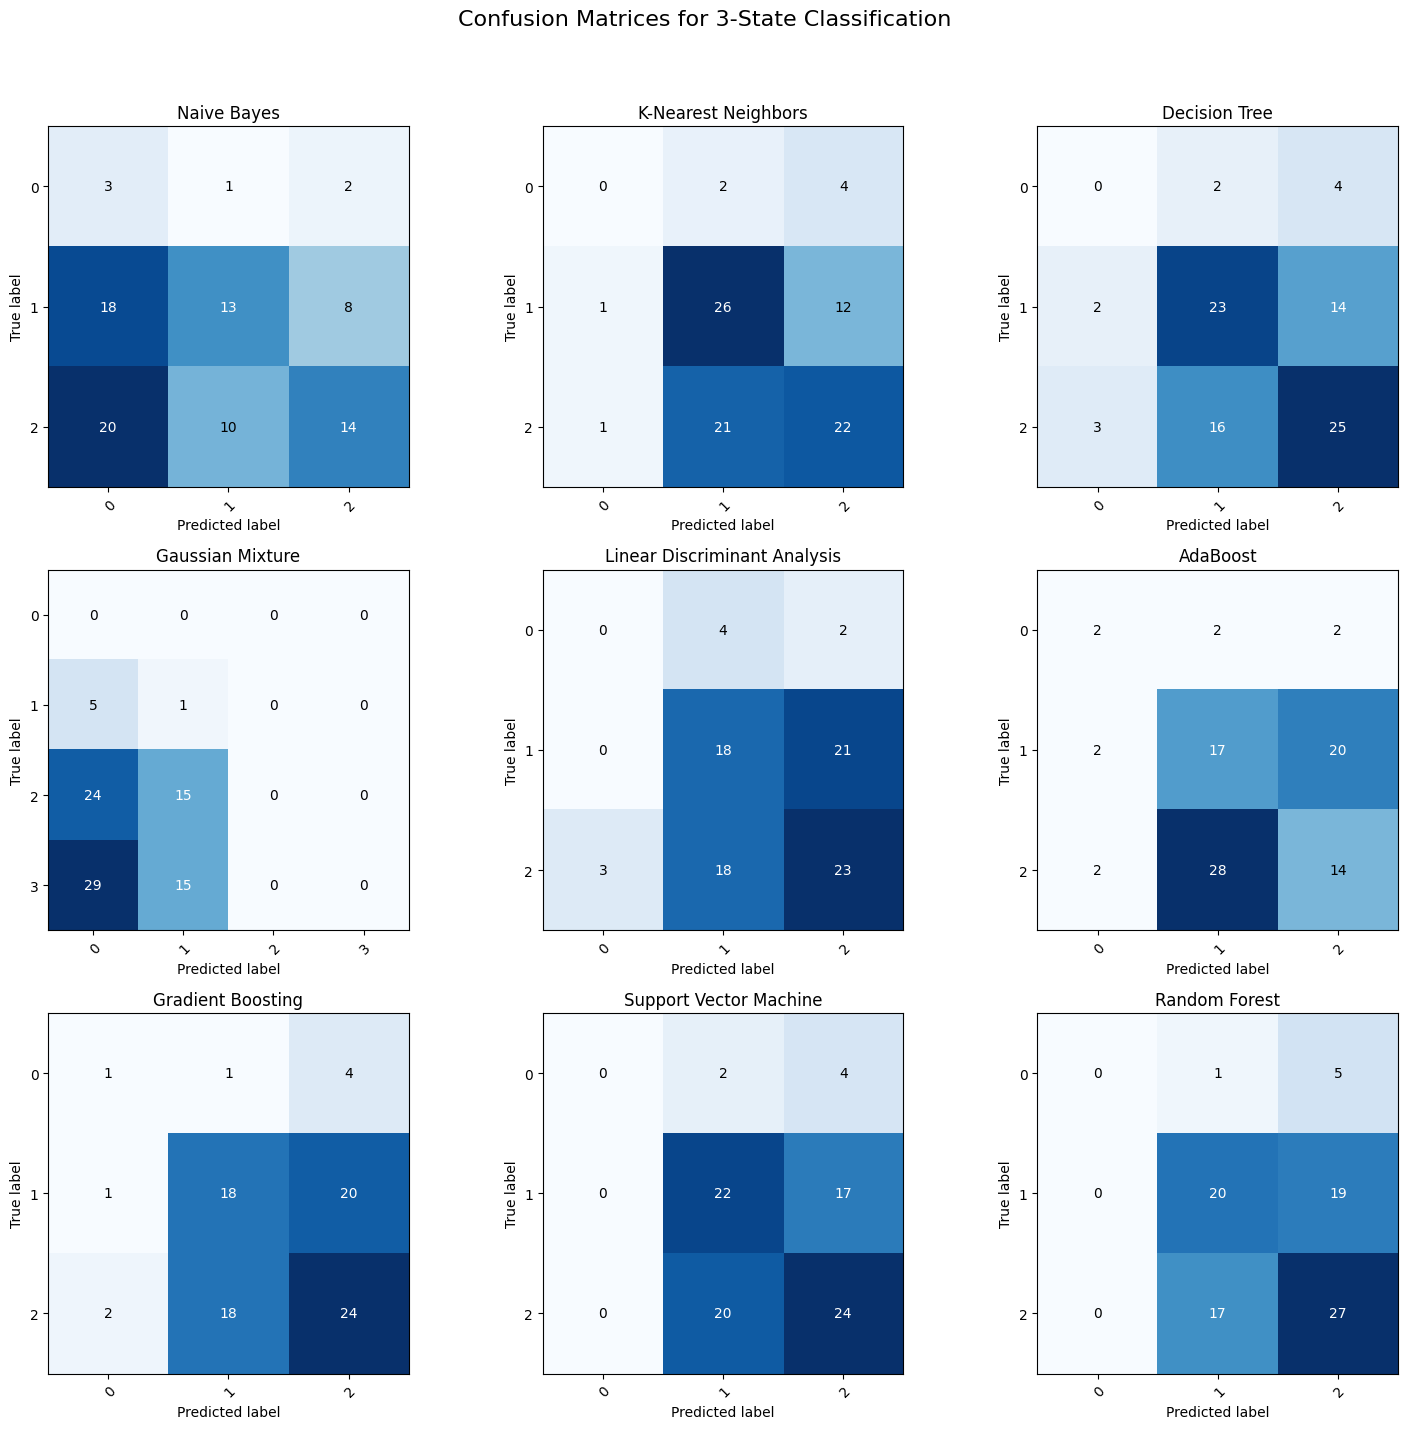

                              accuracy precision_macro recall_macro  f1_macro
Naive Bayes                   0.335948        0.402326     0.381481  0.284275
K-Nearest Neighbors           0.537908        0.365517     0.387169  0.369647
Decision Tree                  0.51634        0.371243     0.371429  0.364937
Gaussian Mixture              0.044444        0.015534         0.15  0.027976
Linear Discriminant Analysis  0.459477        0.307806      0.32619  0.311217
AdaBoost                      0.369935        0.284392     0.386508  0.310263
Gradient Boosting             0.494118        0.411287     0.409392  0.398484
Support Vector Machine        0.515686        0.351058     0.369312  0.345872
Random Forest                  0.49281        0.330606     0.347487  0.330051


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

X=X.drop(["Motivacija", "Anksioznost", "Introvertiranost", "Sensing", "Feeling", "Judging"], axis=1)

# Create a figure with subplots for confusion matrices
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Confusion Matrices for 3-State Classification', fontsize=16)

# Create an empty DataFrame to store results
results_df = pd.DataFrame(index=classifier_names, columns=scoring)

# Perform 5-fold cross-validation for each classifier
for clf, name, ax in zip(classifiers, classifier_names, axs.flatten()):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Cross-validation scores
    scores = cross_validate(clf, X, y, cv=cv, scoring=scoring)
    
    # Update results_df with mean scores
    for metric in scoring:
        results_df.loc[name, metric] = np.mean(scores[f'test_{metric}'])
    
    # Confusion matrix
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    cm = confusion_matrix(y, y_pred)
    
    # Plot confusion matrix
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=name,
           xlabel='Predicted label',
           ylabel='True label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add values in the cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2 else "black")

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display the results table
print(results_df)

results_df = results_df.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

# Save to CSV
results_df.to_csv('classification_3_state.csv', index=False)
